<a href="https://colab.research.google.com/github/Eaag2001/IA-Sistemas2024/blob/main/PerceptronAdult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Adult**

Indica el inicio de la implementación de un perceptrón, donde se definen los parámetros básicos del modelo como la tasa de aprendizaje ***(eta)***, el número de iteraciones ***(n_iter)*** y una semilla para la generación de números aleatorios ***(random_state)***.

In [1]:
from IPython.display import Image

import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=20, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

* **Inicialización:** Se generan pesos pequeños aleatorios.
* **Iteración:** Se repasa el conjunto de datos varias veces (controlado por n_iter).
* **Ajuste:** En cada iteración, los pesos se ajustan en función de si la predicción fue correcta o no.
Almacenamiento de errores: Se registra el número de errores en cada iteración.
* **Salida:** El método retorna el modelo entrenado.
Este proceso de ajuste de pesos sigue la lógica del algoritmo del perceptrón para ajustar un modelo de clasificación binaria

In [2]:
def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
        errors = 0
        for xi, target in zip(X, y):
          update = self.eta * (target - self.predict(xi))
          self.w_[1:] += update * xi
          self.w_[0] += update
          errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

* **net_input:** Calcula la entrada neta o suma ponderada de las características de entrada 𝑋 usando los pesos ajustados del modelo.
* **predict:** Clasifica las entradas basándose en si la entrada neta es mayor o menor a cero, devolviendo 1 si es positiva y -1 si es negativa.

In [3]:
def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

* La primera parte del código calcula el ángulo entre dos vectores usando el producto punto y las normas de los vectores.
* La segunda parte carga un conjunto de datos de adultos desde una URL y muestra las primeras cinco filas de ese conjunto de datos.

In [4]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


En esta parte del codigo se vizualiza un subconjunto del conjunto de datos de adultos, mostrando la relación entre la edad y las horas trabajadas por semana, diferenciando entre aquellos que ganan menos o igual a $50,000 y aquellos que ganan más.

[' <=50K' ' >50K']


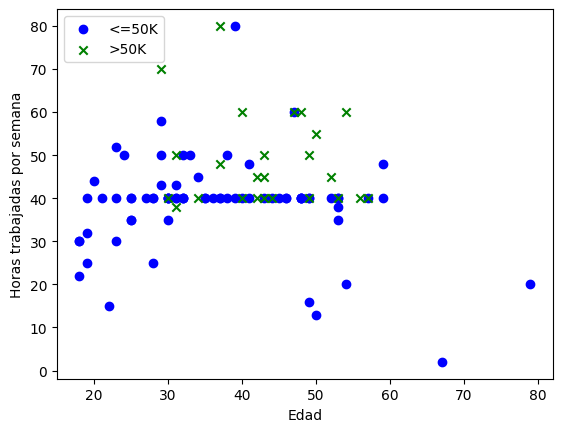

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(df[14].unique())

y = df.iloc[0:100, 14].values
y = np.where(y == ' <=50K', -1, 1)

X = df.iloc[0:100, [0, 12]].values

# Graficar los datos de personas que ganan <=50K y >50K
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', marker='o', label='<=50K')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', marker='x', label='>50K')

plt.xlabel('Edad')
plt.ylabel('Horas trabajadas por semana')
plt.legend(loc='upper left')

plt.show()